In [2]:
install.packages("dplyr")
install.packages("readxl")
install.packages("ggplot2")
library(ggplot2)
library(readxl)
library(dplyr)

Warning message:
"package 'dplyr' is in use and will not be installed"Warning message:
"package 'readxl' is in use and will not be installed"Warning message:
"package 'ggplot2' is in use and will not be installed"

In [3]:
install.packages("dplyr")


Warning message:
"package 'dplyr' is in use and will not be installed"

In [4]:
library(dplyr)

In [6]:
install.packages("ggplot2")

Warning message:
"package 'ggplot2' is in use and will not be installed"

In [7]:
library(ggplot2)

In [8]:
library(readxl)

In [9]:
install.packages("readxl")

Warning message:
"package 'readxl' is in use and will not be installed"

In [15]:
customer_r <- read_excel("customer_r.xlsx")
reservation_r <- read_excel("reservation_r.xlsx")
order_info_r <- read_excel("order_info_r.xlsx")
item_r <- read_excel("item_r.xlsx")
colnames(customer_r) <- tolower(colnames(customer_r))
colnames(reservation_r) <- tolower(colnames(reservation_r))
colnames(order_info_r) <- tolower(colnames(order_info_r))
colnames(item_r) <- tolower(colnames(item_r))

In [16]:
df_f_join_1 <- inner_join(reservation_r, order_info_r, by="reserv_no")

In [17]:
df_f_join_2 <- inner_join(df_f_join_1, item_r, by = "item_id")

In [18]:
df_branch_items <- df_f_join_2 %>% filter(branch == "강남"|branch =="마포"|branch=="서초") 

In [19]:
table(df_branch_items$branch, df_branch_items$product_name)

      
       JUICE PASTA PIZZA SALAD SALAD_BAR SANDWICH SEA_FOOD SPECIAL_SET STEAK
  강남     2     4     5     2         3        2        4          13    12
  마포     1     2     4     0         3        3        1           4     3
  서초     1     5     2     1         2        1        0           2     5
      
       WINE
  강남    5
  마포    0
  서초    0

In [20]:
df_branch_items_table <- as.data.frame(table(df_branch_items$branch, df_branch_items$product_name))

In [21]:
df_branch_items_percent <- df_branch_items_table %>% 
group_by(df_branch_items_table$Var1) %>% 
mutate(percent_items = Freq/sum(Freq)*100)

In [22]:
head(df_branch_items_percent)

Var1,Var2,Freq,df_branch_items_table$Var1,percent_items
강남,JUICE,2,강남,3.846154
마포,JUICE,1,마포,4.761905
서초,JUICE,1,서초,5.263158
강남,PASTA,4,강남,7.692308
마포,PASTA,2,마포,9.523810
서초,PASTA,5,서초,26.315789


In [25]:
gg <- ggplot(df_branch_items_percent, aes(x=Var1, y=percent_items, group = Var1, fill = Var2))+
geom_bar(stat = "identity")

In [26]:
gg <- gg+
labs(title="지점별 주문 건수 그래프", x="지점", y="메뉴 아이템 판매비율", fill = "메뉴 아이템")

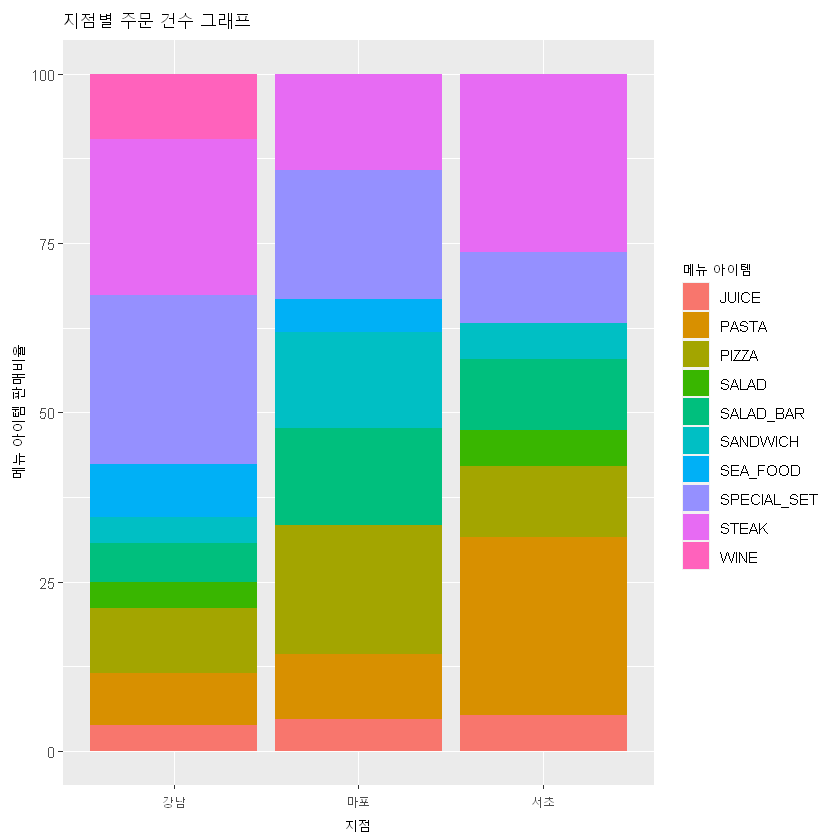

In [28]:
gg

In [29]:
df_rfm_join_1 <- inner_join(reservation_r, order_info_r, by="reserv_no")

In [30]:
head(df_rfm_join_1)

reserv_no,reserv_date,reserv_time,customer_id,branch,visitor_cnt,cancel,order_no,item_id,quantity,sales
2019082701,20190827,1800,W1340914,마포,2,N,190827547272110010,M0001,2,48000
2019082602,20190826,1200,W341658,동작,5,N,190826137302710010,M0010,5,30000
2019082601,20190826,1800,W1328993,강북,4,N,190826137192910010,M0005,4,140000
2019082501,20190825,1800,W1340463,용산,2,N,190825107839310010,M0008,2,20000
2019082401,20190824,1200,W1344912,강동,3,N,190824137844710010,M0006,3,75000
2019082301,20190823,1800,W1344753,영등포,2,N,190823107844510010,M0004,1,25000


In [32]:
df_rfm_data <- df_rfm_join_1 %>% 
group_by(customer_id) %>% 
summarise(visit_sum = n_distinct(reserv_no), sales_sum = sum(sales)/1000) %>% 
arrange(customer_id)

In [33]:
df_rfm_data

customer_id,visit_sum,sales_sum
W1327595,2,188
W1327803,2,210
W1328432,3,246
W1328505,5,287
W1328786,1,10
W1328985,2,178
W1328993,1,140
W1329560,1,24
W1329954,1,48
W1329962,2,48


In [34]:
summary(df_rfm_data)

 customer_id          visit_sum       sales_sum      
 Length:170         Min.   :1.000   Min.   :   6.00  
 Class :character   1st Qu.:1.000   1st Qu.:  40.75  
 Mode  :character   Median :1.000   Median : 100.00  
                    Mean   :1.982   Mean   : 146.81  
                    3rd Qu.:3.000   3rd Qu.: 192.00  
                    Max.   :8.000   Max.   :1006.00  

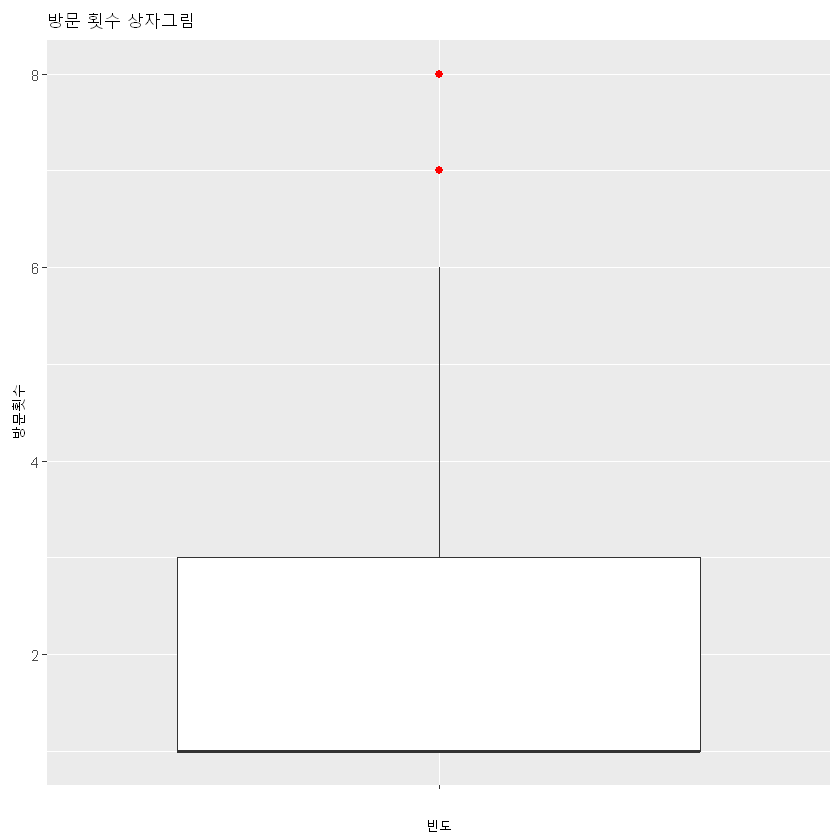

In [35]:
ggplot(df_rfm_data, aes(x="", y=visit_sum))+
geom_boxplot(width = 0.8, outlier.size = 2, outlier.colour = "red")+
labs(title = "방문 횟수 상자그림", x="빈도", y="방문횟수")

Warning message:
"Ignoring unknown parameters: outlier_colour"

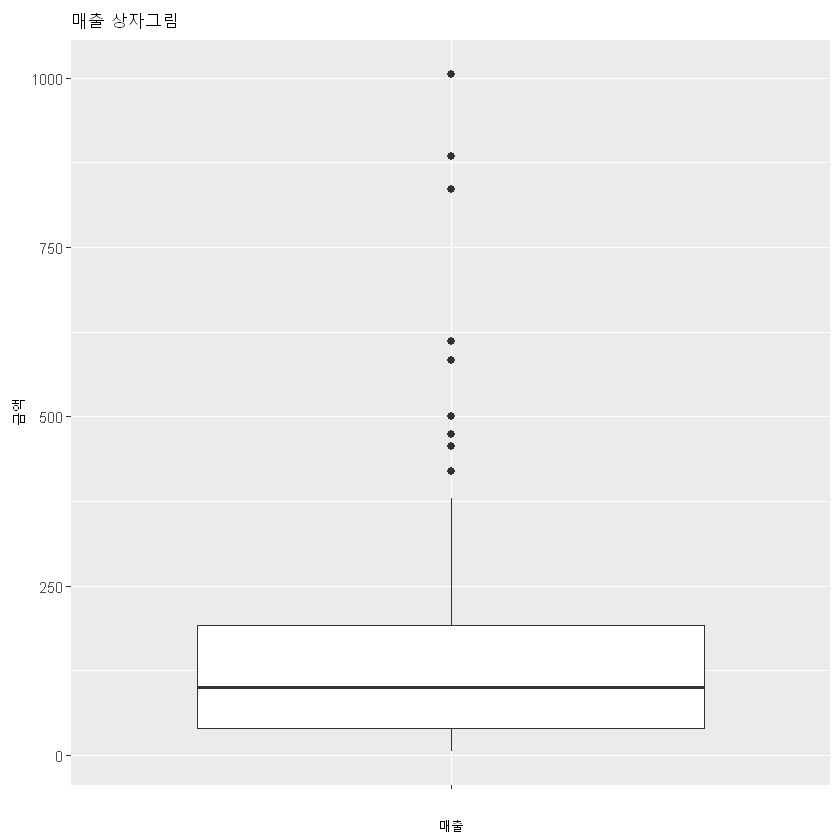

In [36]:
ggplot(df_rfm_data, aes(x="", y=sales_sum))+
geom_boxplot(width = 0.8, outlier.size = 2, outlier_colour="red")+
labs(title="매출 상자그림", x = "매출", y="금액")

In [37]:
quantile(df_rfm_data$visit_sum, probs=c(0.6, 0.9))

60% 90% 
  2   4

In [40]:
quantile(df_rfm_data$sales_sum, probs = c(0.6, 0.9))

60%   90% 
135.0 304.1

In [41]:
total_sum_data <- df_rfm_data %>% 
summarise(t_visit_sum = sum(visit_sum), t_sales_sum=sum(sales_sum))

In [45]:
loyalty_sum_data <- df_rfm_data %>% 
summarise(l_visit_sum = sum(ifelse(visit_sum>2, visit_sum,0)), 
          l_sales_sum = sum(ifelse(sales_sum>135, sales_sum, 0)))

In [46]:
loyalty_sum_data / total_sum_data

l_visit_sum,l_sales_sum
0.5163205,0.7496093


In [47]:
df_f_join_1 <- inner_join(reservation_r, order_info_r, by = "reserv_no")

In [48]:
df_f_join_2 <- inner_join(df_f_join_1, item_r, by = "item_id")

In [49]:
target_item <- c("M0005", "M0009") #스테이크와 와인

In [51]:
 #스테이크와 메뉴 아이템 동시 주문 여부를 확인
df_stime_order <- df_f_join_2 %>% 
filter((item_id %in% target_item)) %>% #스테이크나 와인을 주문한 경우 선택
group_by(reserv_no) %>% #예약 번호로 그룹화
mutate(order_cnt = n()) %>% #그룹화된 행 세기 (mutate로 만든다.)
distinct(branch, reserv_no, order_cnt) %>% #중복 예약 번호는 하나만 출력
filter(order_cnt ==2) %>%  #2인경우 선택(스테이크와 와인을 동시에 주문한 경우)
arrange(branch)

In [52]:
df_stime_order

reserv_no,branch,order_cnt
2019123107,강남,2
2019122901,강남,2
2019122801,강남,2
2019122810,강동,2
2019122804,광진,2
2019112101,노원,2
2019091201,동대문,2
2019122703,동대문,2
2019112102,동작,2
2019123006,양천,2


In [58]:
#동시 주문한 예약번호만 담는 stime_order변수생성
stime_order_rsv_no <- df_stime_order$reserv_no
#예약번호만 선택

In [56]:
#동시 주문 예약번호이면서 스테이크와 와인일 경우만 선택
df_stime_sales <- df_f_join_2 %>%  
filter((reserv_no %in% stime_order_rsv_no)&(item_id %in% target_item)) %>%  
group_by(reserv_no, product_name) %>% #예약번호와 메뉴 아이템으로 그룹화
summarise(sales_amt = sum(sales)/1000) %>%  #매출 합계 요약 계싼
arrange(product_name,reserv_no) #메뉴 아이템, 예약번호 기준으로 정렬

`summarise()` has grouped output by 'reserv_no'. You can override using the `.groups` argument.


In [57]:
df_stime_sales
#동시 주문 12건이므로 매출 합계 24개 생성(스테이크+와인)

reserv_no,product_name,sales_amt
2019091201,STEAK,70
2019112101,STEAK,280
2019112102,STEAK,280
2019120202,STEAK,420
2019122702,STEAK,70
2019122703,STEAK,70
2019122801,STEAK,175
2019122804,STEAK,70
2019122810,STEAK,70
2019122901,STEAK,140


In [63]:
steak <- df_stime_sales %>% filter(product_name == "STEAK")
wine <- df_stime_sales %>% filter(product_name == "WINE")

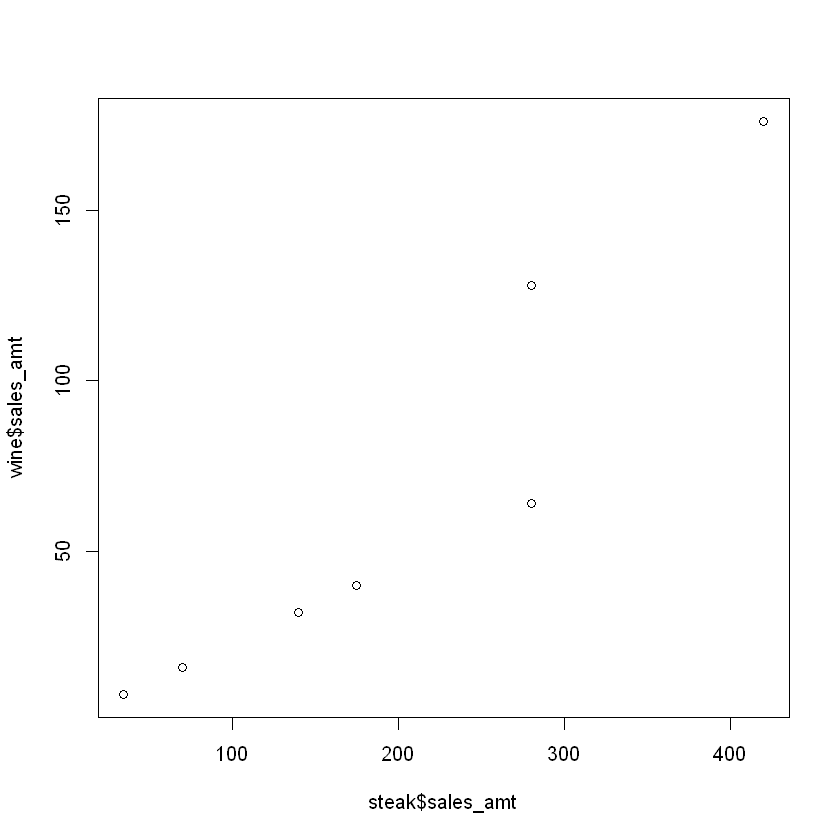

In [64]:
plot(steak$sales_amt, wine$sales_amt)

In [65]:
cor.test(steak$sales_amt, wine$sales_amt)


	Pearson's product-moment correlation

data:  steak$sales_amt and wine$sales_amt
t = 9.5423, df = 10, p-value = 2.438e-06
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.8244838 0.9859970
sample estimates:
      cor 
0.9492339 


In [66]:
steak

reserv_no,product_name,sales_amt
2019091201,STEAK,70
2019112101,STEAK,280
2019112102,STEAK,280
2019120202,STEAK,420
2019122702,STEAK,70
2019122703,STEAK,70
2019122801,STEAK,175
2019122804,STEAK,70
2019122810,STEAK,70
2019122901,STEAK,140


In [67]:
wine

reserv_no,product_name,sales_amt
2019091201,WINE,16
2019112101,WINE,128
2019112102,WINE,64
2019120202,WINE,176
2019122702,WINE,16
2019122703,WINE,16
2019122801,WINE,40
2019122804,WINE,16
2019122810,WINE,16
2019122901,WINE,32
